<a href="https://colab.research.google.com/github/TruongScotl/Problem-Based-Learning/blob/main/bank_marketing_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [ ]:
df = pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv', delimiter = ';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


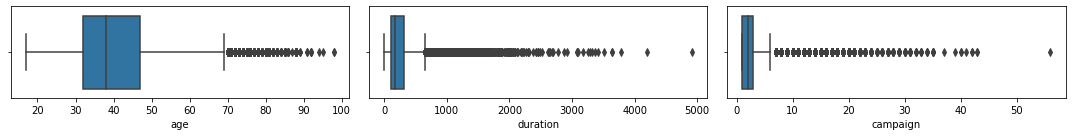

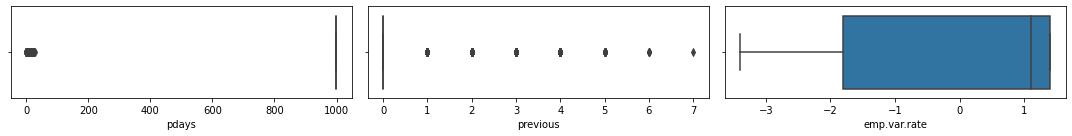

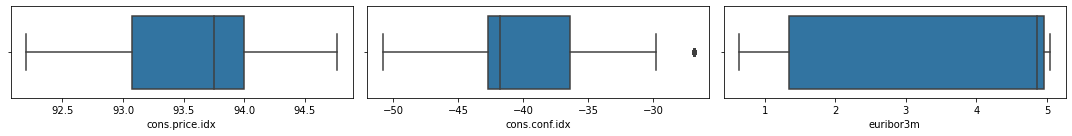

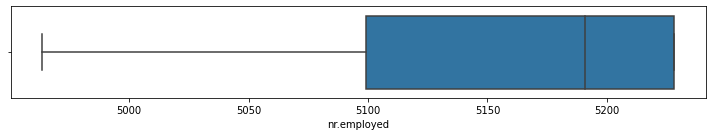

In [ ]:
box_figsize = (15,2)
binwith = 5

f, ax = plt.subplots(1, 3, sharey = True, figsize = box_figsize)
sns.boxplot(data = df, ax = ax[0], x = 'age')
sns.boxplot(data = df, ax = ax[1], x = 'duration')
sns.boxplot(data = df, ax = ax[2], x = 'campaign')
f.tight_layout()

f, ax = plt.subplots(1, 3, sharey = True, figsize = box_figsize)
sns.boxplot(data = df, ax = ax[0], x = 'pdays')
sns.boxplot(data = df, ax = ax[1], x = 'previous')
sns.boxplot(data = df, ax = ax[2], x = 'emp.var.rate')
f.tight_layout()

f, ax = plt.subplots(1, 3, sharey = True, figsize = box_figsize)
sns.boxplot(data = df, ax = ax[0], x = 'cons.price.idx')
sns.boxplot(data = df, ax = ax[1], x = 'cons.conf.idx')
sns.boxplot(data = df, ax = ax[2], x = 'euribor3m')
f.tight_layout()

f, ax = plt.subplots(figsize = (10,2))
sns.boxplot(data = df , ax = ax , x = 'nr.employed')
f.tight_layout()

plt.show()

In [ ]:
df.describe(include = ['bool','object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


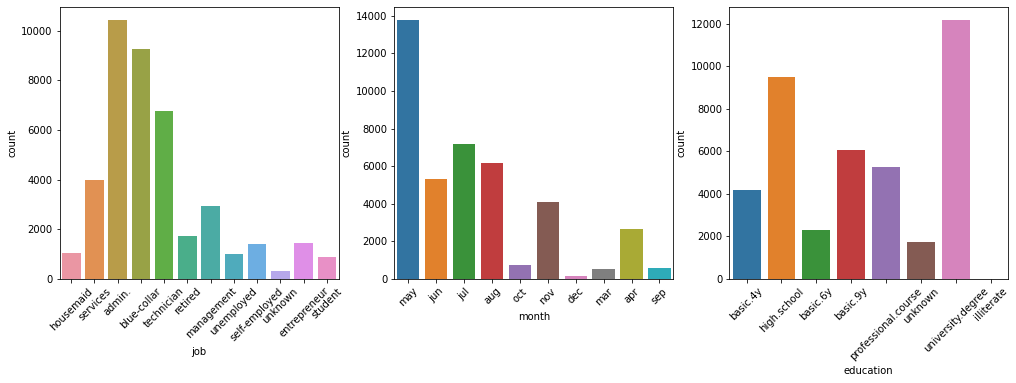

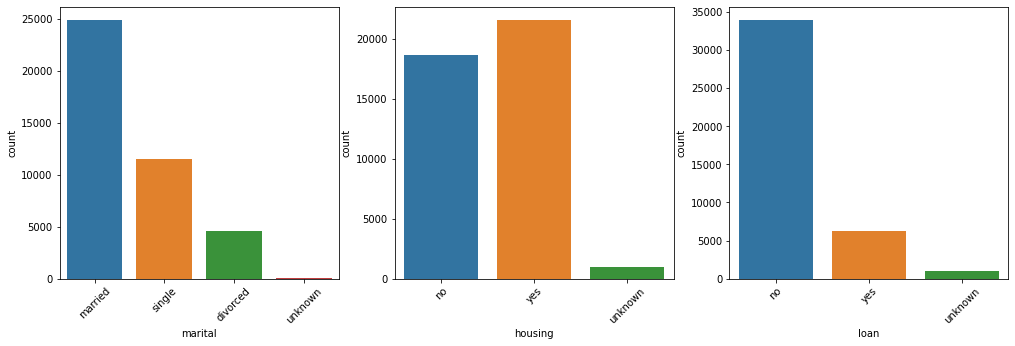

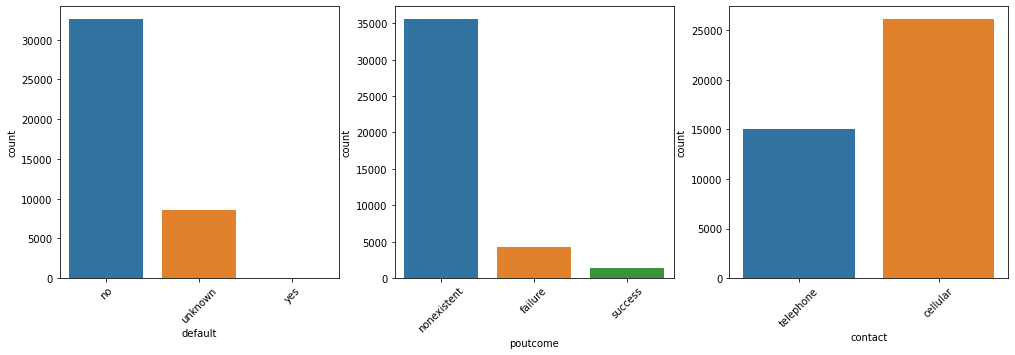

In [ ]:
count_size = (17,5)

fig, ax = plt.subplots(1,3, sharey = False, figsize = count_size)
plt.xticks(rotation = 45)
sns.countplot(x = 'job', data = df, ax = ax[0])
sns.countplot(x = 'month', data = df, ax = ax[1])
sns.countplot(x = 'education', data = df, ax = ax[2])
for i in range(3):
    ax[i].tick_params(axis = 'x', rotation = 45)
    
fig, ax = plt.subplots(1,3, sharey = False, figsize = count_size)
plt.xticks(rotation = 45)
sns.countplot(x = 'marital', data =df, ax = ax[0])
sns.countplot(x = 'housing', data =df, ax = ax[1])
sns.countplot(x = 'loan', data =df , ax = ax[2])
for i in range(3):
    ax[i].tick_params(axis = 'x', rotation = 45)
    
fig, ax = plt.subplots(1,3, sharey = False, figsize = count_size)
sns.countplot(x = 'default', data =df, ax = ax[0])
sns.countplot(x = 'poutcome', data =df ,ax = ax[1])
sns.countplot(x = 'contact', data =df, ax =ax[2])
for i in range(3):
    ax[i].tick_params(axis = 'x', rotation = 45)

In [ ]:
print(df.education.unique())
df['education'].value_counts().reset_index()

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


,index,education
0,university.degree,12168
1,high.school,9515
2,basic.9y,6045
3,professional.course,5243
4,basic.4y,4176
5,basic.6y,2292
6,unknown,1731
7,illiterate,18


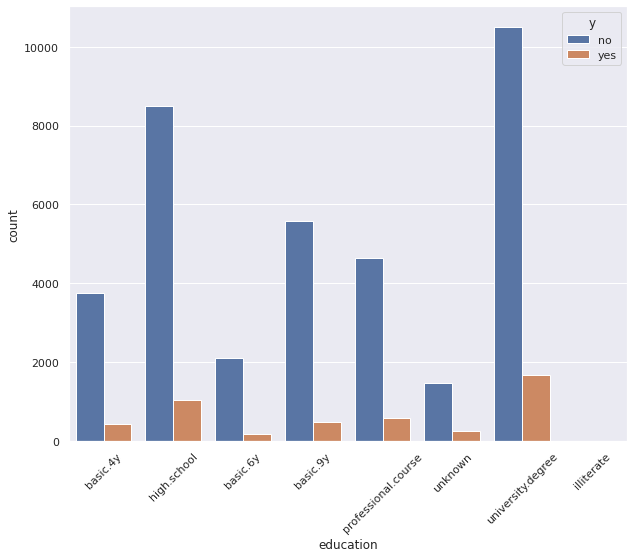

In [ ]:
#Is high education has 
plt.figure(figsize = (10,8))
sns.set_theme(style = "darkgrid")
ax = sns.countplot(x="education", hue="y", data=df)
plt.xticks(rotation = 45)
plt.show()

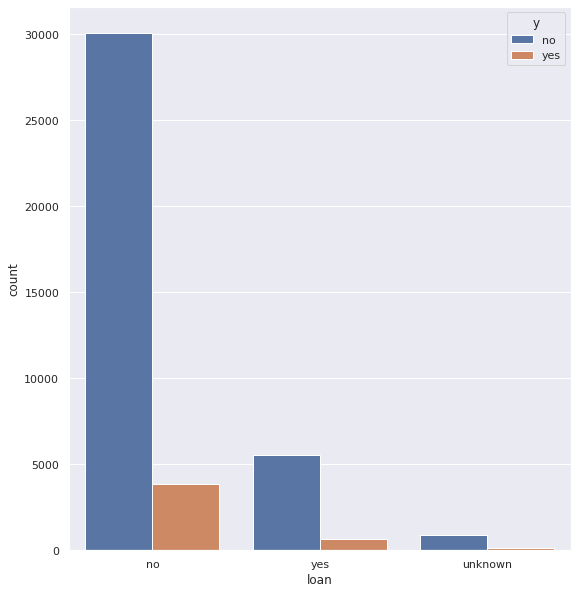

In [ ]:
plt.figure(figsize = (9,10))
ax = sns.countplot(x = 'loan', hue = 'y', data = df)

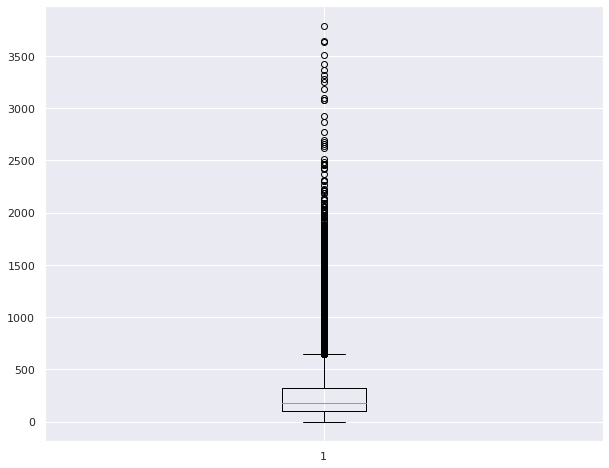

In [ ]:
#processing outlier
df['duration'].loc[df.duration > 4000]
df['duration'].loc[22192] = df['duration'].mean()
df['duration'].loc[24091] = df['duration'].mean()

#boxplot
plt.figure(figsize = (10,8))
plt.boxplot(df['duration'])
plt.show()

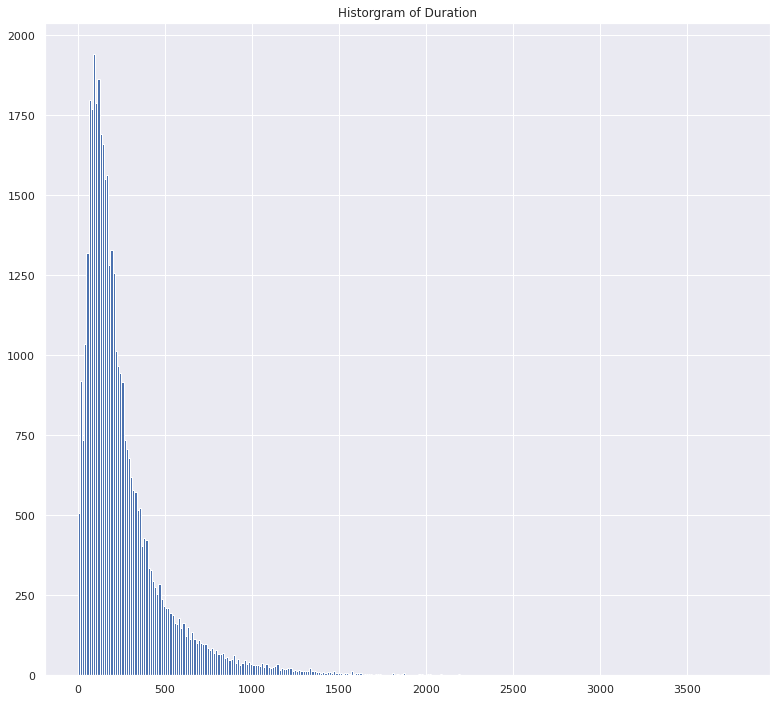

In [ ]:
plt.figure(figsize= (13,12))
plt.hist(df['duration'], bins = 'auto')
plt.title('Historgram of Duration')
plt.show()

In [ ]:
mapper = {'yes':1, 'no': 0}
df['y'] = df['y'].map(mapper)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
kde_df = df.select_dtypes(include = [np.float, np.int64])
kde_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


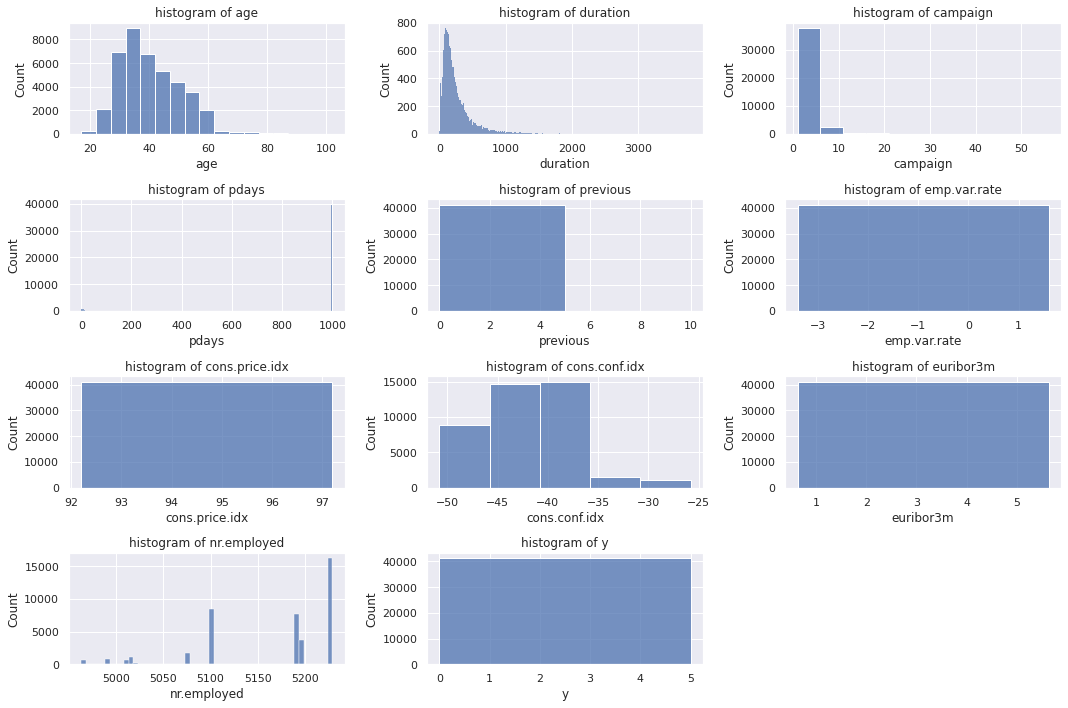

In [ ]:
plt.figure(figsize = (15,10))
for ax, col in enumerate(kde_df.columns[:12]):
    plt.subplot(4,3, ax+1)
    plt.title(f'histogram of {col}')
    sns.histplot(data = df[col], binwidth = 5)
plt.tight_layout()


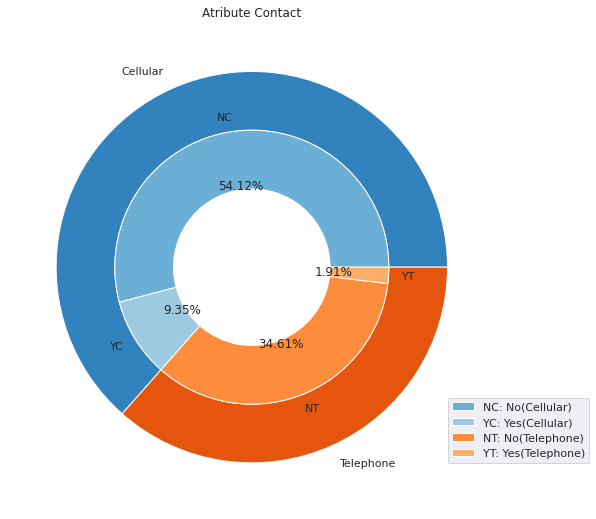

In [ ]:
fig, ax = plt.subplots(figsize = (14,9))
size = 0.3

name = 'Cellular', 'Telephone'
name_in = 'NC', 'YC', 'NT','YT'
#contact
pie = df['contact'].value_counts().reset_index()
#cellular
df_cellular = df[df['contact'] == 'cellular']
pie_cellular = df_cellular['y'].value_counts().reset_index()
#telephone
df_telephone = df[df['contact'] == 'telephone']
pie_telephone = df_telephone['y'].value_counts().reset_index()

pie = np.array([pie_cellular['y'], pie_telephone['y']])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])
#outer pie
ax.pie(pie.sum(axis=1), radius=1, colors=outer_colors,labels = name,
       wedgeprops=dict(width=size, edgecolor='w'))
#inner pie
ax.pie(pie.flatten(), radius=1-size, colors=inner_colors,autopct = '%1.2f%%',labels = name_in,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.margins(0,0)
plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()
subgroup = ['NC: No(Cellular)','YC: Yes(Cellular)','NT: No(Telephone)','YT: Yes(Telephone)']
ax.legend(handles[2:], subgroup, loc=(0.9, 0.1))
plt.title("Atribute Contact")
plt.show()

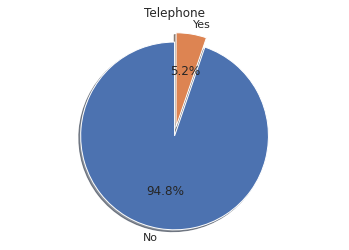

In [ ]:
sns.set_theme(style= "whitegrid")
fig, ax = plt.subplots()
explode = (0,0.1)
labels = 'No', 'Yes'
df_telephone = df[df['contact'] == 'telephone']
pie = df_telephone['y'].value_counts().reset_index()
#pie = df['contact'].value_counts().reset_index()
ax.pie(pie['y'], explode = explode, labels = labels , autopct= '%1.1f%%',
      shadow = True, startangle = 90)
ax.axis('equal')
plt.title('Telephone')
plt.show()

[0 1]


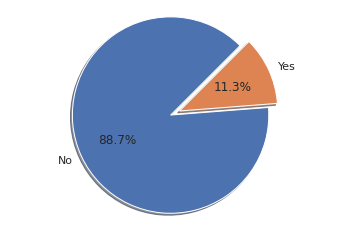

In [ ]:
print(df['y'].unique())
fig, ax1 = plt.subplots()
labels = 'No', 'Yes'
new_y = df['y'].value_counts().reset_index()
explode = [0, 0.1]
plt.pie(new_y['y'], explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 45)
ax1.axis('equal')
plt.show()

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

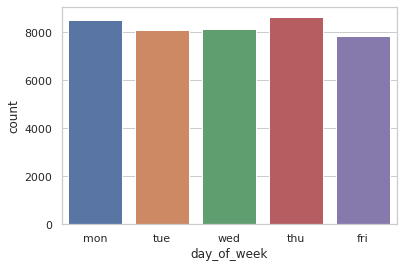

In [ ]:
df['day_of_week'].unique()
sns.countplot(x = 'day_of_week', data = df)

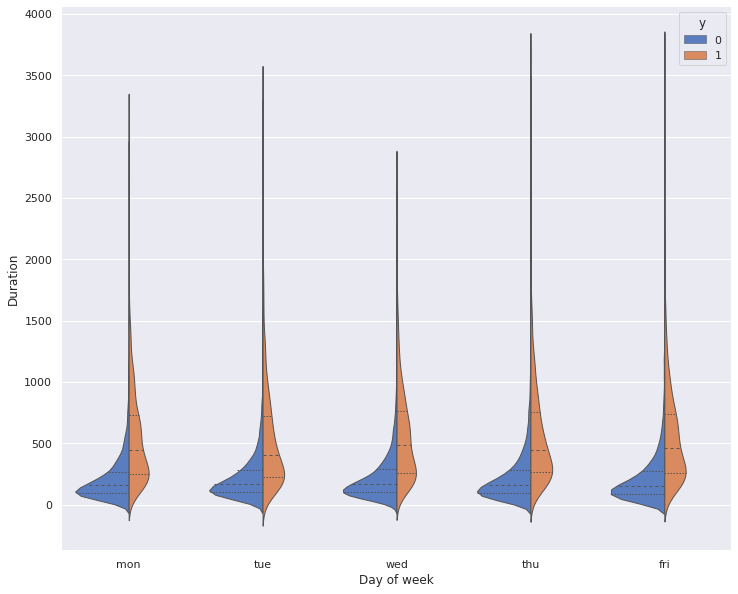

In [ ]:
plt.figure(figsize = (12,10))
sns.set_theme(style = 'darkgrid')
sns.violinplot(data = df, x = 'day_of_week', y = 'duration', hue = 'y',
              split= True, inner = 'quart', linewidth =1,
              palette = "muted")
plt.xlabel("Day of week")
plt.ylabel("Duration")
sns.despine(left=True)
plt.show()

In [ ]:
def outlier(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    mini, maxi = q1-1.5*iqr, q3+1.5*iqr
    return mini, maxi

In [ ]:
print(outlier(df['age']))
df['age'].describe()

(9.5, 69.5)


count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

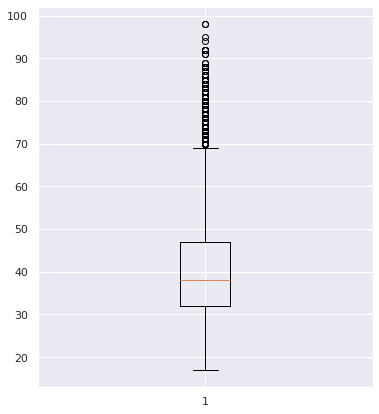

In [ ]:
# age group
plt.figure(figsize = (6,7))
plt.boxplot(x = 'age', data = df)
plt.show()

In [ ]:
# what age group will buy product ?
print(df['age'].loc[df['age'] > 69.5].shape)
print(df['age'].sort_values(ascending = True).unique())

(469,)
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]


In [ ]:
#split group to data
# under 20, 20-25, 25-30, 35-40, 45- 50, 55 - 60, 65-70, 75-80, 85-90, higher than 90
df['agegroup'] = df['age']
df.loc[(df['age'] < 20), 'AgeGroup'] = 'Under 20'
df.loc[(df['age'] >= 20) & (df['age'] < 25), 'AgeGroup'] = '20-25'
df.loc[(df['age'] >= 25) & (df['age'] < 30), 'AgeGroup'] = '25-30'
df.loc[(df['age'] >= 30) & (df['age'] < 35), 'AgeGroup'] = '30-35'
df.loc[(df['age'] >= 35) & (df['age'] < 40), 'AgeGroup'] = '35-40'
df.loc[(df['age'] >= 40) & (df['age'] < 45), 'AgeGroup'] = '40-45'
df.loc[(df['age'] >= 45) & (df['age'] < 50), 'AgeGroup'] = '45-50'
df.loc[(df['age'] >= 50) & (df['age'] < 55), 'AgeGroup'] = '50-55'
df.loc[(df['age'] >= 55) & (df['age'] < 60), 'AgeGroup'] = '55-60'
df.loc[(df['age'] >= 60) & (df['age'] < 65), 'AgeGroup'] = '60-65'
df.loc[(df['age'] >= 65) & (df['age'] < 70), 'AgeGroup'] = '65-70'
df.loc[(df['age'] >= 70) & (df['age'] < 75), 'AgeGroup'] = '70-75'
df.loc[(df['age'] >= 75) & (df['age'] < 80), 'AgeGroup'] = '75-80'
df.loc[(df['age'] >= 80) & (df['age'] < 85), 'AgeGroup'] = '80-85'
df.loc[(df['age'] >= 85) & (df['age'] < 90), 'AgeGroup'] = '85-90'
df.loc[(df['age'] > 90), 'AgeGroup'] = 'Higher 90'

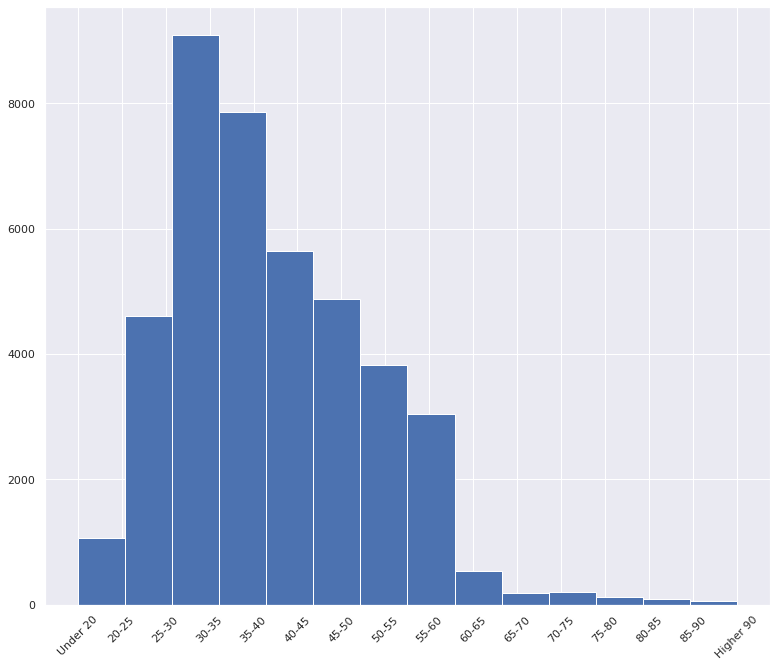

In [ ]:
plt.figure(figsize = (13,11))
df_age = df[['age','AgeGroup']].sort_values(by = ['age'])
df_age['AgeGroup'].hist(bins = 14)
plt.xticks(rotation = 45)
plt.show()

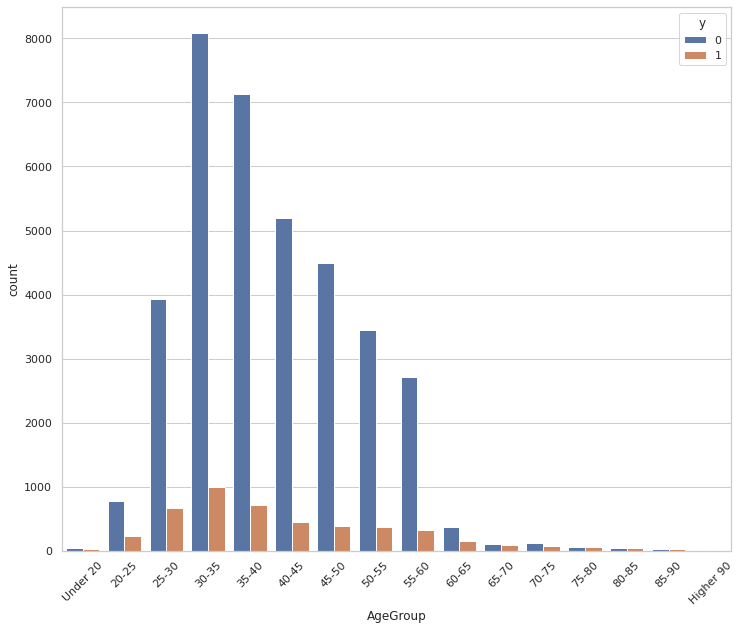

In [ ]:
# which age group subcribe a term deposit the most ?
plt.figure(figsize = (12,10))
sns.set_theme(style = 'whitegrid')
df_age_y = df[['age', 'AgeGroup', 'y']].sort_values(by = ['age'])
sns.countplot(x = 'AgeGroup', hue = 'y', data = df_age_y)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#limit = yes/(yes+no)*100 > 30%
#filter out what agegroup has limit > 30%
df_age_y.groupby(df_age_y['AgeGroup'].value_counts())

Seem like [under 20, 60-90] will subcribe a term deposit. But looklike it hard to see ? So how can I improve ? 

# *Social and economic context attributes*

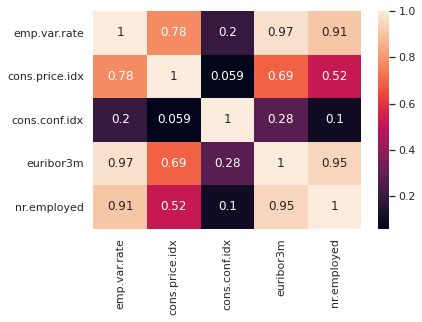

In [ ]:
#emp.var.rate: ti le thay doi viec lam - theo quy
#cons.price.idx: chi so gia tieu dung - theo thang
#cons.conf.idx: chi so niem tin tieu dung - theo thang
#euribor3m: lai suat euribor 3 thang - theo ngay
#nr.employed: so nhan vien - theo quy
df_soeco = df[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
sns.heatmap(df_soeco.corr(), annot = True)
plt.show()

In [ ]:
df_soeco.describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


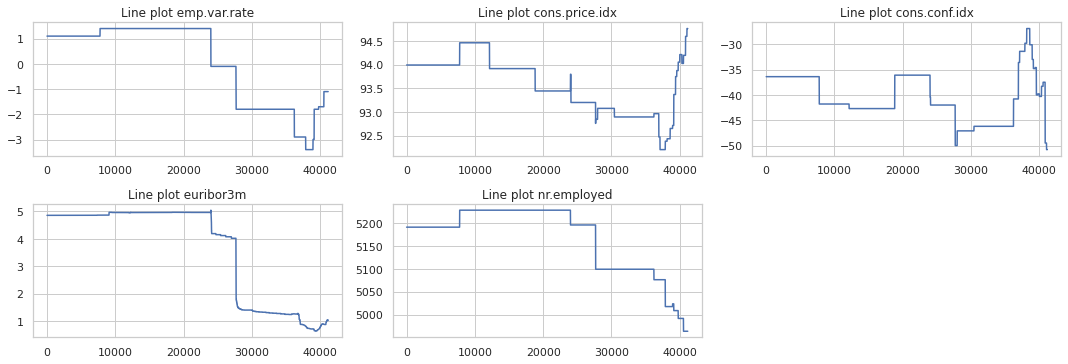

In [ ]:
plt.figure(figsize = (15,10))
for ax, col in enumerate(df_soeco.columns):
    plt.subplot(4,3, ax+1)
    plt.title(f'Line plot {col}')
    df[col].plot()
plt.tight_layout()

In [ ]:
df['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [ ]:
new_df = df.loc[df['cons.conf.idx']==-36.4]
new_df['month'].unique()
new_df = df.loc[df['cons.conf.idx']==-41.]
new_df['month'].unique()

array([], dtype=object)

<BarContainer object of 41188 artists>

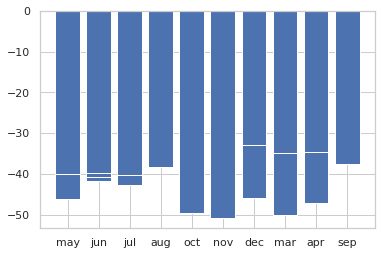

In [ ]:
con_df = df[['cons.conf.idx','month']]
x = con_df['cons.conf.idx']
y = con_df['month']
plt.bar(y,x)

So manycustomer didn't buy the product, why ? what really influence a customer's purchase decision ?
# Is data imbalance ?

In [ ]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup,AgeGroup
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56,55-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,57,55-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,37,35-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,40,40-45
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56,55-60


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000
mean,40.02406,258.076199,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,40.02406
std,10.42125,257.529539,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,10.42125
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,17.00000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,32.00000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,38.00000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,47.00000
max,98.00000,3785.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,98.00000


43.0


<AxesSubplot:xlabel='campaign'>

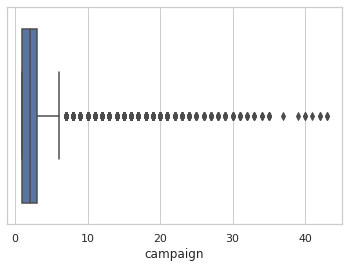

In [ ]:
df['campaign'].loc[(df['campaign'] == 56)] = df['campaign'].mean()
print(df['campaign'].max())
sns.boxplot(x = 'campaign', data = df)

<AxesSubplot:xlabel='cons.conf.idx'>

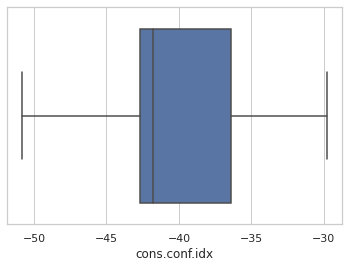

In [ ]:
df['cons.conf.idx']
df['cons.conf.idx'].loc[df['cons.conf.idx'] == -26.9] = df['cons.conf.idx'].mean()
sns.boxplot(x = 'cons.conf.idx', data = df)

<AxesSubplot:>

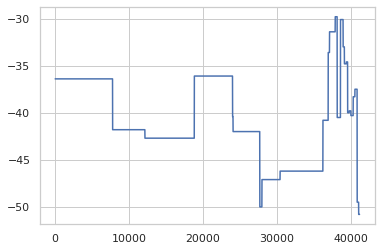

In [ ]:
df['cons.conf.idx'].plot()

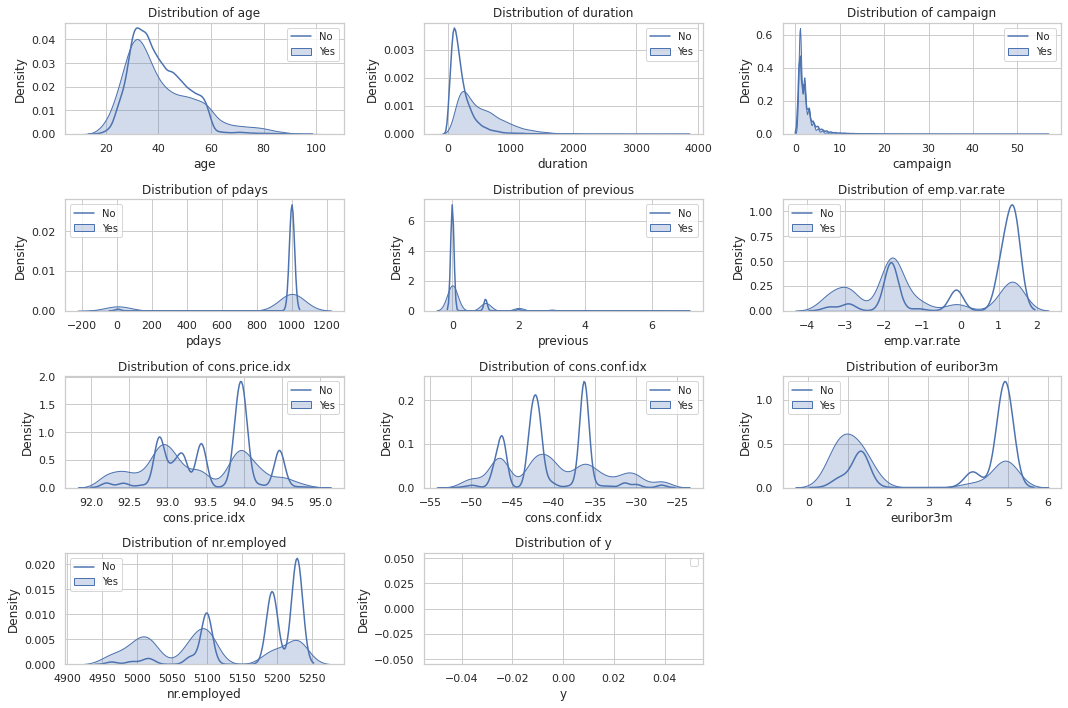

In [ ]:
yes = kde_df.query('y == 1')
no  = kde_df.query('y == 0')

plt.figure(figsize = (15,10))
for ax,col in enumerate(kde_df.columns[:12]):
    plt.subplot(4,3, ax+1)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(x = yes[col], label='Yes', fill = True)
    sns.kdeplot(x = no[col], label='No')
    plt.legend(prop=dict(size=10))
plt.tight_layout()

# ***Feature and Modeling***

***Feature selecting***

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     1975.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:43:44   Log-Likelihood:                -50375.
No. Observations:               41188   AIC:                         1.008e+05
Df Residuals:                   41177   BIC:                         1.009e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.388e-16      0.004   3.43e

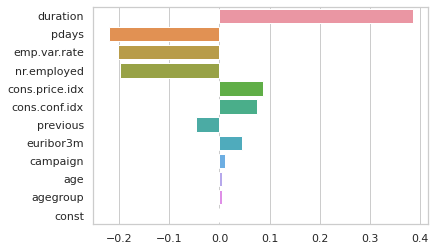

In [ ]:
from scipy import stats
import statsmodels.api as sm
X_term =  df[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',
               'cons.conf.idx','euribor3m','nr.employed','agegroup']]
y = df['y']

X_norm = pd.DataFrame(stats.zscore(X_term), columns = X_term.columns)
X_norm = sm.add_constant(X_norm)

y_norm = pd.Series(stats.zscore(y), name = y.name)
model_stand = sm.OLS(y_norm, X_norm)
model_stand_res = model_stand.fit()
print(model_stand_res.summary())

coeff = model_stand_res.params
coeff = coeff.iloc[(coeff.abs()*(-1.0)).argsort()]
sns.barplot(coeff.values, coeff.index, orient = 'h')
plt.show()

In [ ]:
df.corr()
#duration, cons.conf.idx, age, previous 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup
age,1.000000,-0.001002,0.004977,-0.034369,0.024365,-0.000371,0.000857,0.117808,0.010767,-0.017725,0.030399,1.000000
duration,-0.001002,1.000000,-0.072329,-0.048059,0.021064,-0.028419,0.005718,-0.011699,-0.033606,-0.045496,0.407141,-0.001002
campaign,0.004977,-0.072329,1.000000,0.052731,-0.079337,0.151135,0.128077,-0.002232,0.135412,0.144594,-0.066492,0.004977
pdays,-0.034369,-0.048059,0.052731,1.000000,-0.587514,0.271004,0.078889,-0.072645,0.296899,0.372605,-0.324914,-0.034369
previous,0.024365,0.021064,-0.079337,-0.587514,1.000000,-0.420489,-0.203130,-0.075918,-0.454494,-0.501333,0.230181,0.024365
emp.var.rate,-0.000371,-0.028419,0.151135,0.271004,-0.420489,1.000000,0.775334,0.280354,0.972245,0.906970,-0.298334,-0.000371
cons.price.idx,0.000857,0.005718,0.128077,0.078889,-0.203130,0.775334,1.000000,0.128294,0.688230,0.522034,-0.136211,0.000857
cons.conf.idx,0.117808,-0.011699,-0.002232,-0.072645,-0.075918,0.280354,0.128294,1.000000,0.347640,0.175030,0.026925,0.117808
euribor3m,0.010767,-0.033606,0.135412,0.296899,-0.454494,0.972245,0.688230,0.347640,1.000000,0.945154,-0.307771,0.010767
nr.employed,-0.017725,-0.045496,0.144594,0.372605,-0.501333,0.906970,0.522034,0.175030,0.945154,1.000000,-0.354678,-0.017725


In [ ]:
df.describe(include = ['bool', 'object'])
# job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,AgeGroup
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,16
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-35
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,9085


In [ ]:
from scipy.stats import ttest_ind
import plotly.graph_objs as go

yes = kde_df.query('y==1')
no = kde_df.query('y==0')

ttest_results_pvalues,ttest_results_statistic = [],[]
for ax,col in enumerate(kde_df.columns[:9]):
    statistic,pvalue = ttest_ind(yes[col],no[col])
    ttest_results_pvalues.append(pvalue)
    ttest_results_statistic.append(statistic)
    
ttest_res_df = pd.DataFrame({'S':ttest_results_statistic,'P':ttest_results_pvalues,'F':kde_df.columns[:9]})
ttest_res_df = ttest_res_df.sort_values(by='P')

tr= go.Bar(x = ttest_res_df['F'], y = ttest_res_df['P'], name = 'T_test P value')
tr2 = go.Bar(x = ttest_res_df['F'], y = ttest_res_df['S'], name = 'T-test F statistic')

data = [tr2, tr]
fig = go.Figure(data = data, layout ={'title': 'T-test results', 'barmode':'overlay'})
fig.show()

Why dont have any P-value ? Or I am wrong ? Something is missing ?

In [ ]:
X1 = df[['duration', 'cons.conf.idx', 'age', 'previous']]
X2 = df[['duration','cons.conf.idx','cons.price.idx','euribor3m','campaign','age','previous']]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.2, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, random_state = 42)

tree = DecisionTreeClassifier().fit(X_train1, y_train1)
tree2 = DecisionTreeClassifier().fit(X_train2, y_train2)

y1_pred = tree.predict(X_train1)
y2_pred = tree2.predict(X_train2)
#old 99.86039453717754
print('Accuracy :', accuracy_score(y_train1,y1_pred)*100)
print('Accuracy :', accuracy_score(y_train2,y2_pred)*100)

tn, fp, fn, tp = confusion_matrix(y_train1, y1_pred).ravel()
f1 = tp/(tp+1/2*(fp+fn))
print(f'F1 score: {f1}')

Accuracy : 99.86039453717754
Accuracy : 99.99089529590289
F1 score: 0.9937533948940793


In [ ]:
kde_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# Note: always split into test and train sets Before trying oversampling techniques
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
y = kde_df.y
X = kde_df.drop('y',axis =1)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

#concatenate our training data back together
X = pd.concat([X_train, y_train], axis = 1)

# separate minority and majority classes
not_fraud = X[X.y==0]
fraud = X[X.y==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

upsampled.y.value_counts()

0    29279
1    29279
Name: y, dtype: int64

In [ ]:
# try againt with logistic Regression
y_train = upsampled.y
X_train = upsampled.drop('y', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, upsampled_pred))
print(f1_score(y_test, upsampled_pred))
print(recall_score(y_test, upsampled_pred))

NameError: name 'LogisticRegression' is not defined

In [ ]:
y1_pred = tree.predict(X_test1)
y2_pred = tree2.predict(X_test2)

print('Accuracy :', accuracy_score(y_test1,y1_pred)*100)
print('Accuracy :', accuracy_score(y_test2,y2_pred)*100)

tn, fp, fn, tp = confusion_matrix(y_test1, y1_pred).ravel()
f1 = tp/(tp + 1/2*(fp+fn))
print(f'F1 score: {f1}')